In [1]:
#Import libraries:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8, 5

C:\Users\J\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = np.loadtxt('data.csv', delimiter=',')
X = data[:, :-1]
y = data[:, -1]

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=True )

In [4]:
X_val, X_test, y_val, y_test, = train_test_split(X_test, y_test, test_size=0.5, shuffle=True)

In [99]:
cla = XGBClassifier(
    learning_rate =0.01,
    n_estimators=5000,
    max_depth = 3,
    min_child_weight = 1,
    gamma = 0.4,
    subsample = 0.9,
    colsample_bytree = 0.5,
    nthread=4,
    scale_pos_weight=1,
    reg_alpha = 1.5 ,
    seed=27
)

In [100]:
cla.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.5,
       gamma=0.4, learning_rate=0.01, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=5000, nthread=4,
       objective='binary:logistic', reg_alpha=1.5, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.9)

In [101]:
cla.score(X_train, y_train)

0.94347826086956521

In [103]:
cla.score(X_val, y_val)

0.73376623376623373

In [102]:
cla.score(X_test, y_test)

0.75974025974025972

In [104]:
from sklearn import metrics
print(metrics.classification_report(y_test, cla.predict(X_test)))

             precision    recall  f1-score   support

        0.0       0.79      0.86      0.82       100
        1.0       0.69      0.57      0.63        54

avg / total       0.75      0.76      0.75       154



# 正则化参数

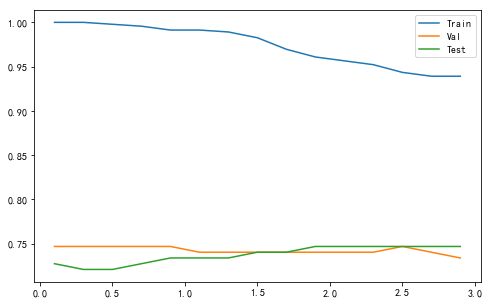

In [21]:
score_train = []
score_val = []
score_test = [] 
for i in np.arange(0.1,3,0.2):
    cla.reg_alpha = i 
    cla.fit(X_train, y_train)
    score_train.append(cla.score(X_train, y_train))
    score_val.append(cla.score(X_val, y_val))
    score_test.append(cla.score(X_test, y_test))
    
plt.plot(np.arange(0.1,3,0.2), score_train, label='Train')
plt.plot(np.arange(0.1,3,0.2), score_val, label='Val')
plt.plot(np.arange(0.1,3,0.2), score_test, label='Test')
plt.legend()

In [68]:
cla.reg_alpha = 1.5
cla.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.5,
       gamma=0.38, learning_rate=0.01, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=5000, nthread=4,
       objective='binary:logistic', reg_alpha=1.5, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.9)

# 最大深度max_depth和最小子树min_child_weight

In [71]:
score_train = []
score_val = []
score_test = [] 
depth_lists = np.arange(1,6,2)
weight_lists = np.arange(1,6,2)
for depth in depth_lists:
    for weight in weight_lists:
        cla.max_depth = depth     
        cla.min_child_weight = weight

        cla.fit(X_train, y_train)
        score_train.append(cla.score(X_train, y_train))
        score_val.append(cla.score(X_val, y_val))
        score_test.append(cla.score(X_test, y_test))
        
        print('depth:\t', depth)
        print('weight:\t', weight)
        print('Val Score:\t', cla.score(X_val, y_val))
        print('_________________________________________')

depth:	 1
weight:	 1
Val Score:	 0.74025974026
_________________________________________
depth:	 1
weight:	 3
Val Score:	 0.74025974026
_________________________________________
depth:	 1
weight:	 5
Val Score:	 0.74025974026
_________________________________________
depth:	 3
weight:	 1
Val Score:	 0.733766233766
_________________________________________
depth:	 3
weight:	 3
Val Score:	 0.753246753247
_________________________________________
depth:	 3
weight:	 5
Val Score:	 0.74025974026
_________________________________________
depth:	 5
weight:	 1
Val Score:	 0.733766233766
_________________________________________
depth:	 5
weight:	 3
Val Score:	 0.753246753247
_________________________________________
depth:	 5
weight:	 5
Val Score:	 0.74025974026
_________________________________________


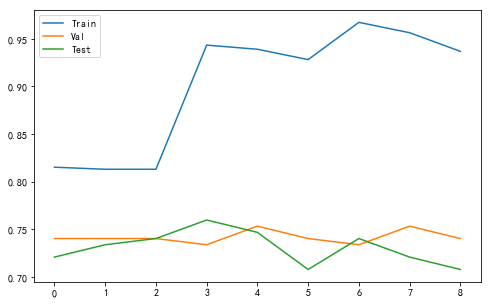

In [31]:
plt.plot(range(len(score_test)), score_train, label='Train')
plt.plot(range(len(score_test)), score_val, label='Val')
plt.plot(range(len(score_test)), score_test, label='Test')
plt.legend()

In [72]:
np.argmax(score_val)

4

In [75]:
cla.max_depth = 3    
cla.min_child_weight = 1
cla.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.5,
       gamma=0.38, learning_rate=0.01, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=5000, nthread=4,
       objective='binary:logistic', reg_alpha=1.5, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.9)

In [76]:
print(metrics.classification_report(y_test, cla.predict(X_test)))

             precision    recall  f1-score   support

        0.0       0.79      0.86      0.82       100
        1.0       0.69      0.57      0.63        54

avg / total       0.75      0.76      0.75       154



# gamma

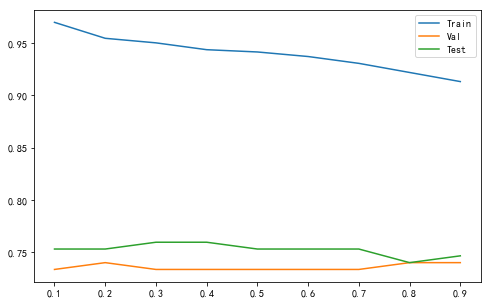

In [77]:
score_train = []
score_val = []
score_test = [] 
gamma_lists = np.arange(0.1,1,0.1)
for gamma in gamma_lists:
    cla.gamma = gamma 
    cla.fit(X_train, y_train)
    score_train.append(cla.score(X_train, y_train))
    score_val.append(cla.score(X_val, y_val))
    score_test.append(cla.score(X_test, y_test))
    
plt.plot(gamma_lists, score_train, label='Train')
plt.plot(gamma_lists, score_val, label='Val')
plt.plot(gamma_lists, score_test, label='Test')
plt.legend()


In [78]:
np.argmax(score_val)

1

In [79]:
cla.gamma = 0.2
cla.fit(X_train, y_train)
print(metrics.classification_report(y_test, cla.predict(X_test)))

             precision    recall  f1-score   support

        0.0       0.79      0.85      0.82       100
        1.0       0.67      0.57      0.62        54

avg / total       0.75      0.75      0.75       154



# 子集subsample和树colsample_bytree

In [81]:
score_train = []
score_val = []
score_test = [] 
subsample_lists = np.arange(0.5,1,0.1)
colsample_bytree_lists = np.arange(0.5,1,0.1)
for subsample in subsample_lists:
    for colsample in colsample_bytree_lists:
        cla.subsample = subsample     
        cla.colsample_bytree = colsample

        cla.fit(X_train, y_train)
        score_train.append(cla.score(X_train, y_train))
        score_val.append(cla.score(X_val, y_val))
        score_test.append(cla.score(X_test, y_test))
        
        print('subsample:\t', subsample)
        print('colsample_bytree:\t', colsample)
        print('Val Score:\t', cla.score(X_val, y_val))
        print('_________________________________________')

subsample:	 0.5
colsample_bytree:	 0.5
Val Score:	 0.733766233766
_________________________________________
subsample:	 0.5
colsample_bytree:	 0.6
Val Score:	 0.733766233766
_________________________________________
subsample:	 0.5
colsample_bytree:	 0.7
Val Score:	 0.733766233766
_________________________________________
subsample:	 0.5
colsample_bytree:	 0.8
Val Score:	 0.753246753247
_________________________________________
subsample:	 0.5
colsample_bytree:	 0.9
Val Score:	 0.746753246753
_________________________________________
subsample:	 0.6
colsample_bytree:	 0.5
Val Score:	 0.733766233766
_________________________________________
subsample:	 0.6
colsample_bytree:	 0.6
Val Score:	 0.733766233766
_________________________________________
subsample:	 0.6
colsample_bytree:	 0.7
Val Score:	 0.746753246753
_________________________________________
subsample:	 0.6
colsample_bytree:	 0.8
Val Score:	 0.727272727273
_________________________________________
subsample:	 0.6
colsample_by

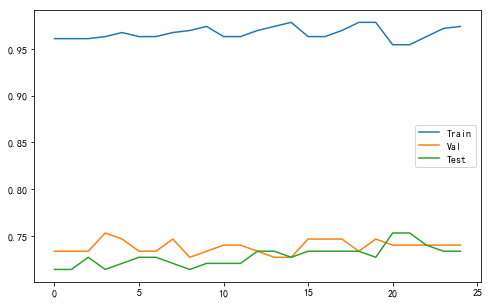

In [82]:
plt.plot(range(len(score_test)), score_train, label='Train')
plt.plot(range(len(score_test)), score_val, label='Val')
plt.plot(range(len(score_test)), score_test, label='Test')
plt.legend()

In [83]:
np.argmax(score_test)

20

In [87]:
cla.subsample = 0.9 
cla.colsample_bytree = 0.5
cla.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.5,
       gamma=0.2, learning_rate=0.01, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=5000, nthread=4,
       objective='binary:logistic', reg_alpha=1.5, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.9)

In [88]:
print(metrics.classification_report(y_test, cla.predict(X_test)))

             precision    recall  f1-score   support

        0.0       0.79      0.85      0.82       100
        1.0       0.67      0.57      0.62        54

avg / total       0.75      0.75      0.75       154

